## The Bayes theorem: from $P(y|\theta)$, to $P(\theta|y)$

Using the binomial formula, we can calculate $P(y|\theta)$, which is the probability of observing our data $y$ (e.g., getting a certain number of heads) given any value of $\theta$ (the probability of getting heads on a single toss). But again, what we really want to know is how confident we should be about the actual value of $\theta$, given the data we have observed. In other words, we're seeking $P(\theta|y)$: the probability of a particular value of $\theta$ (in our case, $\theta=0.5$). So we need to flip $P(y|\theta)$ to obtain $P(\theta|y)$. 

The Bayesian theorem enables us to do exactly that. It provides a mathematical formulae to obtain the probability of a parameter (or several) parameters, given the data we have observed. You will often hear that the Bayes theorem is a mathematical framework to update our beliefs about an unknown parameter based on empirical data. This is exactly what we have been trying to do since the beginning, just phrased in a different way. We want to know if our coin is biased, and for that we run an experiment to try to decide whether it is biased or not. This is the same as saying: I believe that the coin is balanced, and I want to know whether this belief is true based on something I have observed. Not that this is also (almost) the same as saying "I believe that this coin is not balanced, and I want to know whether this belief is correct based on my observations". 

The Bayes theorem is a single formulae:
$$P(\Theta|y) = \frac{P(y|\Theta)*P(\Theta)}{P(y)}$$

We have already seen $P(y|\Theta)$, this is the conditional probability of our observation given any value of $\theta$, which is the Binomial distribution. There are two additional terms we haven't seen before: $P(\Theta)$ and $P(y)$. The first ($P(\Theta)$) is referred to as the **prior**, and the second ($P(y)$) is the marginal likelihood or model evidence. Let's have a look at what these are.

### Prior distribution
The prior is the same thing as your belief, or your hypothesis about the true value of the parameter, which you want to test. If your starting hypothesis is that the coin is not biased, then you are basically saying that you believe the most probable value for theta is 0.5. If you are very certain about that, you would say: I believe the probability of $\Theta=0.5$ is 1. So for this particular coin, you are a 100% sure that it is not biased and that any other values of $\Theta$ are basically impossible. If you were to express it as a graph, then it would probably look something like this:

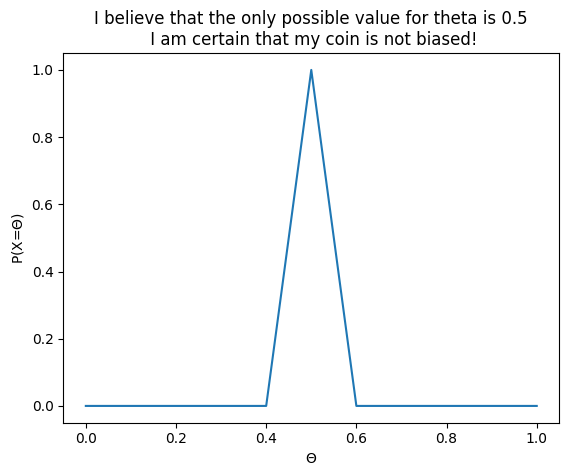

In [84]:
theta_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Values of theta between 0 and 1
theta_proba  = [0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # Probability of each value of theta

fig, ax = plt.subplots()
ax.plot(theta_values, theta_proba)
ax.set_xlabel("$\\Theta$")
ax.set_ylabel("P(X=$\\Theta$)")
ax.set_title("I believe that the only possible value for theta is 0.5\n I am certain that my coin is not biased!")
plt.show()
plt.close()

As we can see, this is kind of representing what we want to say, but this is not perfect. For $\Theta=0.5$, we do have a value of 1, but it looks like at $\Theta=0.45$, we don't have zero. That's to be expected. The simple way we have implemented our belief only specified values for 0.1, 0.2..., but nothing in between, so in the plot above, the dots are connected by taking a straightline between the missing points. We could for sure try to define many more points per hand, but that wouldn't be very efficient. And it would also never be perfect, except if we were to generate an infinity of points, which we of course can't do either. 

When you think about it, what we are trying to do here is a bit similar to what we were trying to achieve with the binomial distribution. The binomial distribution tells us for any value of $\Theta$, what the probability of observing a given value $y$. With the prior, we are trying to find a way to describe how probable each true value of  $\Theta$. If we are very certain that the coin is not biased, then we are basically saying that we believe that  $\Theta=0.5$ is very likely and that other values of  $\Theta$ are not. So the way we should describe our belief should be similar to the way we described the probability of y given theta. So we need to find a **probability distribution** that enables us to encode (so to speak) our belief into mathetmatical term, such that for each possible value of theta, we have a matching probability that aligns with our belief: "Any value far away from 0.5 has a very low probability" if we believe that the coin is not biased.  

Why not use the binomial distribution directly? Well that's because unlike the outcome of our experiment, our priors on the true value of theta doesn't depend on the number of toss we make: the true value of $\Theta$ is universaly true. So we need to find a formulae that encodes our belief about the probability of each value of $\Theta$. 

Remember, because our belief is also a form of probability distribution, it should also sum up to one and be defined for all values of our parameter (so between 0 and 1). There are many other formulae that fit the bill and can do the trick.Which one should we choose from then? The answer depends on the problem at hands. If you look at the Bayes theorem, once we have defined our prior probability distribution ($P(\Theta)$), we will need to multiply it with $P(y|\Theta)$. As we will see a bit later, depending on what kind of distribution we have for $P(\Theta)$ and $P(y|\Theta)$, that might turn out to be a very complicated or downright impossible operation. But there are certain pairs of distribution that work well together, meaning we can multiply them with one another easily enough. We call such pairs of distributions **Conjugates**. So most of the time, the  $P(y|\Theta)$ really depends on the kind of problem we are working on, and we don't really have a choice of which one to choose. So we need to find a distribution for the prior that works well with the $P(y|\Theta)$, if such a distribution exists at all. 

For our current problem, $P(y|\Theta)$ is a Binomial distribution. The conjugate distribution of the binomial distribution is the beta distributrion. On wikipedia The $\beta$ distribution is defined as:

$$f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$

Where:

$$B(\alpha, \Beta)=\frac{\Gamma(\alpha)\Gamma(\Beta)}{\Gamma(\alpha+\beta)}$$

Where:

$$\Gamma(n) = (n-1)!$$



Okay, ouch. So the $\beta$ distribution is a function which consists of another function, and that other function also contains another function, and we have three different greek letter... That looks intimidating. But in fact, it is really quite alright, you just need to spend time to look at it carefully. And in fact, the reason why we have three functions defined above is just because mathematicians are also frightned by long formulae, so they break them down in bits and pieces that makes it easier to manage for them as well. If that makes you feel better, you can also rewrite the beta distribution in one line:

$$f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{\frac{(\alpha-1)!*(\beta-1)!}{(\alpha + \beta -1)!}}$$

The way I have written the $\Gamma$ function above is a bit of a simplification. The formulae I wrote will only work for integer values (1, 2, 3...). But there is a more general form that looks a little bit more complicated that will work for basically any number, but let's keep the math simple for now.

And we can write the beta distribution as a piece of code:

In [88]:
from math import gamma

def beta_distribution(x, alpha, beta):
    """
    Compute the probability density of the Beta distribution at a given value x for parameters alpha and beta.

    The Beta distribution is defined as:
        Beta(x; alpha, beta) = (x^(alpha - 1) * (1 - x)^(beta - 1)) / B(alpha, beta)

    where B(alpha, beta) = (Gamma(alpha) * Gamma(beta)) / Gamma(alpha + beta).
    
    Parameters:
        x (float): The value at which to evaluate the Beta distribution (0 <= x <= 1).
        alpha (float): The shape parameter alpha (> 0).
        beta (float): The shape parameter beta (> 0).

    Returns:
        float: The probability density of the Beta distribution at x.
    """
    # Ensure x is within the valid range
    if x < 0 or x > 1:
        raise ValueError("x must be between 0 and 1.")
    if alpha <= 0 or beta <= 0:
        raise ValueError("alpha and beta must be positive.")
    
    # Compute the denominator:
    denom = (gamma(alpha) * gamma(beta))/(gamma(alpha + beta))  # The Beta(alpha, beta) = (Gamma(alpha) * Gamma(beta)) / Gamma(alpha + beta) above. And instead of using the factorial, we are using the gamma function that will work with any numbers

    # Compute the numerator:
    numer = x ** (alpha - 1)*(1-x)**(beta-1)

    # Return the probability of beta at this particular value of x with alpha and beta:
    return numer/denom 

That doesn't seem all that crazy after all now does it? You might still wonder what the alpha and beta parameters are for. Well these are parameters you can adjust to control the shape of the distribution. Let's try to play around with alpha and beta to get a sense of what they do:

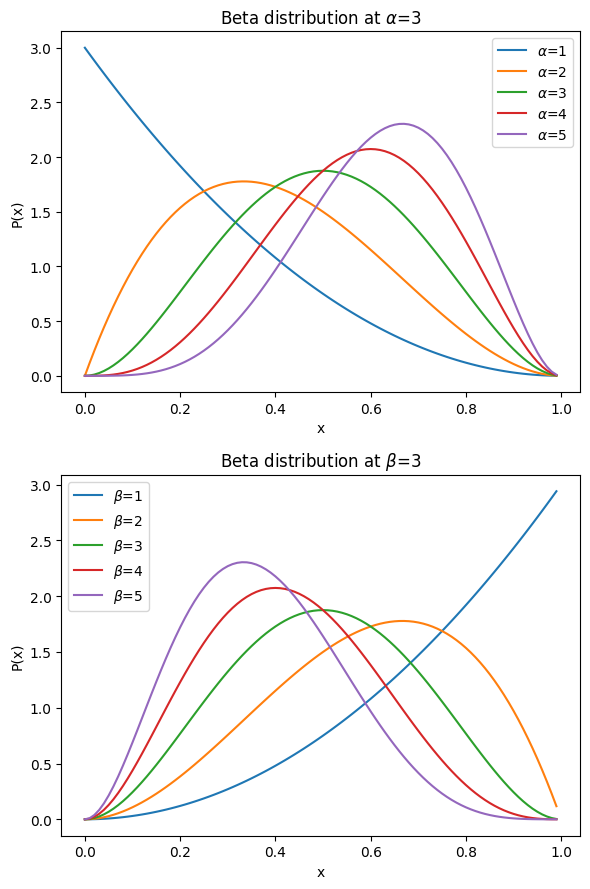

In [107]:
xs = np.arange(0, 1, 0.01)  # Say this is x=theta, we want to get the P(x) at each values of x, for a given value of alpha and beta:
alphas = [1, 2, 3, 4, 5]  # Try values of alpha from 1 to 5
betas = [1, 2, 3, 4, 5]  # Try values of beta from 1 to 5

fig, ax = plt.subplots(2,1, figsize=[6, 9])

# Vary alpha:
for alpha in alphas:
    ax[0].plot(xs, [beta_distribution(x, alpha, 3) for x in xs], label=f"$\\alpha$={alpha}")
ax[0].set_xlabel("x")
ax[0].set_ylabel("P(x)")
ax[0].set_title("Beta distribution at $\\alpha$=3")
ax[0].legend()
# Vary beta:
for beta in betas:
    ax[1].plot(xs, [beta_distribution(x, 3, beta) for x in xs], label=f"$\\beta$={beta}")
ax[1].set_xlabel("x")
ax[1].set_ylabel("P(x)")
ax[1].set_title("Beta distribution at $\\beta$=3")
plt.legend()
plt.tight_layout()
plt.show()


So we can see from the graphs above that when we increase alpha, we somehow move the distribution to the right, and when we increase beta, we move the distribution to the left, and that when alpha=beta, we have a symetrical distribution. In our case, we probably want a prior that is symetrical. If we believe that the coin isn't biased, we think the most likely value is in the middle and that values on the left or on the right are equally unlikely. But in the case above, when we set alpha and beta to 3, the distribution is quite wide, which would mean that we believe that while we believe $\Theta=0.5$, we wouldn't be crazy surprised to learn that it is as large as 0.8, or as low as 0.2. That doesn't seem to match our initial assumption that we are very confident that the coin isn't biased. Let's try other values:

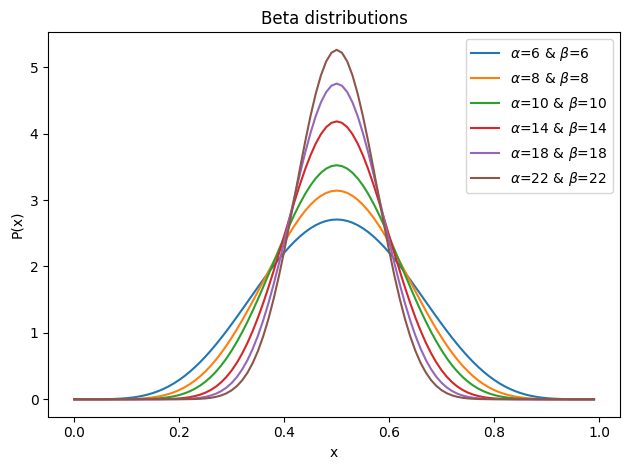

In [111]:
xs = np.arange(0, 1, 0.01)  # Say this is x=theta, we want to get the P(x) at each values of x, for a given value of alpha and beta:
alphas = [6, 8, 10, 14, 18, 22]  # Try values of alpha
betas = [6, 8, 10, 14, 18, 22]  # Try values of beta

fig, ax = plt.subplots()

# Vary alpha:
for i, alpha in enumerate(alphas):
    ax.plot(xs, [beta_distribution(x, alpha, betas[i]) for x in xs], label=f"$\\alpha$={alpha} & $\\beta$={betas[i]}")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_title("Beta distribution at $\\alpha$=3")
ax.legend()
ax.set_title("Beta distributions")
plt.legend()
plt.tight_layout()
plt.show()


The larger alpha and beta are, the tighter the distribution seems to be getting. But still no values we havee tested above seem to match our confidence in the coin being unbiased. So let's try really larger values

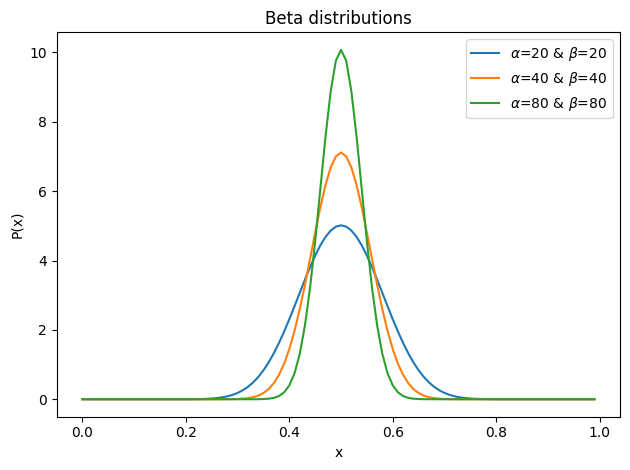

In [116]:
xs = np.arange(0, 1, 0.01)  # Say this is x=theta, we want to get the P(x) at each values of x, for a given value of alpha and beta:
alphas = [20, 40, 80]  # Try values of alpha
betas = [20, 40, 80]  # Try values of beta

fig, ax = plt.subplots()

# Vary alpha:
for i, alpha in enumerate(alphas):
    ax.plot(xs, [beta_distribution(x, alpha, betas[i]) for x in xs], label=f"$\\alpha$={alpha} & $\\beta$={betas[i]}")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_title("Beta distribution at $\\alpha$=3")
ax.legend()
ax.set_title("Beta distributions")
plt.legend()
plt.tight_layout()
plt.show()

It would seem that setting alpha and beta to 80 gets us there. Note that if you try to use very large numbers, you will get an error. That's because there is an integral operation inside the gamma function, which means you obtain numbers that are too large to hold in python.

Note that you could use all the values we have tried above, depending on what your actual belief is. In the example I gave before, I said that you might be very convinced that the true value of theta is 0.5, that is you are very convinced your coin is fair. That might be a good assumption: if you pick a coin at random in your wallet, it is most probably quite fair, given that it is probably the same as any other coin in your wallet and that most coins in the world are not biased. But imagine you picked a coin that was laying around in a magician's shop,  would you be so confident that the coin shouldn't be biased? Probably not. That is one of the very strong advantage of Bayesian statistics: you can take take into account additional information to inform your results. You can adjust your prior to reflect your confidence in the value you think is most likely. If you picked a coin at random, the parameter $\alpha=80$ and $\beta=80$ might be a good prior, but if you pick it in a magician shop, you might want to set it to something lower, like $\alpha=20$ and $\beta=20$.

You might wonder: "Why does it matter how confident I am in my original value? I get the value I get in my experiment, and I will just believe what the experiments tells me". First of all, we have already seen that the experiment might very well give you something else than the true value, and you shouldn't accept blindly the results of your experiment as the ultimate truth. How much you should trust the results of your experiment very much depend on how much you trust your initial guess. Let's take the example of a 52 cards deck. Say you have counted each of the cards and confirmed: I have 4 Queens, 4 kings, 4 jacks... In that case, say you want to run an experiment what the probability is to get a king if you draw a card at random. Your prior should be something like that:

$$P(\Theta) = 4/52$$

Where $P(\Theta)$ is the prior probability of drawing a king, which 4/52, because you know you have 4 kings out of 52 cards. Now say you draw cards many many times, and somehow you end up with an observed $\hat{P}(\Theta)=0.5$. In that scenario, you of course wouldn't believe that the results of the experiment, because you know for a fact that $P(\Theta)=4/52$. So in that example, you shouldn't change your mind all that much based on experimental results, because you have very high confidence of what the true $P(\Theta)$ is. In fact, you have absolute confidence in it: you know for a fact that the probability of $P(\Theta)=4/52$ is 1 while any other values is 0, which is just a very particular probability distribution, which is very peaky. 

This is why, if you want to know the value of a parameter(s) of interest given empirical results ($P(\Theta|y)$), you should always factor in your prior, because it is going to influence the conclusion quite a bit. 

### Combining the prior and the likelihood
So we now know what the two following components are and what they are for in the quest of answering our question of whether a coin is biased:
- $P(y|\Theta)$: Likelihood (of the observed values given any value of $\Theta$)
- $P(\Theta)$: Prior, our belief about the likelihood of each $\Theta$ for our coin

For our specific problem we have:

$$P(y | \Theta) = \binom{n}{y} \Theta^y (1 - \Theta)^{n - y}$$

Where $n$ and $y$ are the number of throws and the number of success in our experiment, respetively. Let's say we fix our number of throw at a thousand. 

And:

$$P(\Theta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$

Where $alpha$ and $beta$ depend on our degree of confidence. Say we are really confident that $\Theta = 0.5$, so let's fix $\alpha=80, \beta=80$. So now, if we want to combine the numerator and the denominator, we can try and figure out the maths. So we want to do:

$$P(y|\Theta) * P(\Theta) = (\binom{n}{y} \Theta^y (1 - \Theta)^{n - y}) * \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$

An important thing to note is that the parameters $n$ and $y$ are fixed for a given experiment, so the term $\binom{n}{y}$ will be fixed for a given experiment, which means that it will be a constant. So when we do: $P(y|\Theta) * P(\Theta)$:
So we have:
$$P(y|\Theta) * P(\Theta) = (k \Theta^y (1 - \Theta)^{n - y}) * \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$
Where $k$ is a constant. So when you look at the equation above, that means that the constant $k$ will scale up or down the final value we get depending on the number of throw we make and on the total number of heads we get, but it won't do much else. Now we need to do a bit of rearranging:

$$P(y|\Theta) * P(\Theta) = \frac{k \Theta^{y+\alpha-1}(1-\Theta)^{(n-y)+\beta-1}}{B(\alpha, \beta)}$$

I didn't add every single step, but that's basically combining the exponents in the right way. And you don't even have to do that, you could just stick to the initial function without simplifying it, but that way it's a bit easier to work with. We write a pretty simple python code to figure out what the numerator of our Bayes theorem would be for any values of all our parameters ($\Theta, y, \beta, \alpha, n$):

In [126]:
def binomial_beta_joint(y, n, theta, alpha, beta):
    """
    Compute the joint probability density of the Beta distribution and Binomial distribution at a given value theta, for a given alpha, beta and y (or whichever way you like really.).

    The joint beta is defined as
        $$P(y|\Theta) * P(\Theta) = \frac{k \Theta^{y+\alpha-1}(1-\Theta)^{(n-y)+\beta-1}}{B(\alpha, \beta)}$$
    
    Parameters:
        y (int): Number of success (heads in our case)
        n (int): Total number of throws
        theta (float): probability of success
        alpha (float): parameter for our prior belief
        beta (float): parameter for our prior belief

    Returns:
        float: The probability density of the Beta distribution at x.
    """
    # Ensure x is within the valid range
    if theta < 0 or theta > 1:
        raise ValueError("x must be between 0 and 1.")
    if alpha <= 0 or beta <= 0:
        raise ValueError("alpha and beta must be positive.")
    if y > n:
        raise ValueError("y cannot be larger than n, because that would mean more successes than we had attempts")
    
    # Compute the denominator:
    denom = (gamma(alpha) * gamma(beta))/(gamma(alpha + beta))  # The Beta(alpha, beta) = (Gamma(alpha) * Gamma(beta)) / Gamma(alpha + beta) above. And instead of using the factorial, we are using the gamma function that will work with any numbers

    # Compute the constant k:
    k = math.comb(n, y)  # Calculate n choose k: \binom{n}{y}
    
    # Compute the numerator:
    numer = k * theta**(y + alpha - 1) * (1-theta)**((n-y)+beta-1)

    # Return the probability of beta at this particular value of x with alpha and beta:
    return numer/denom 

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\alexander.lepauvre\AppData\Local\Temp\ipykernel_17156\669880927.py:2: SyntaxWarning: invalid escape sequence '\T'
  """


Nothing all that crazy after all. Now let's play around with a few values and plot the results:

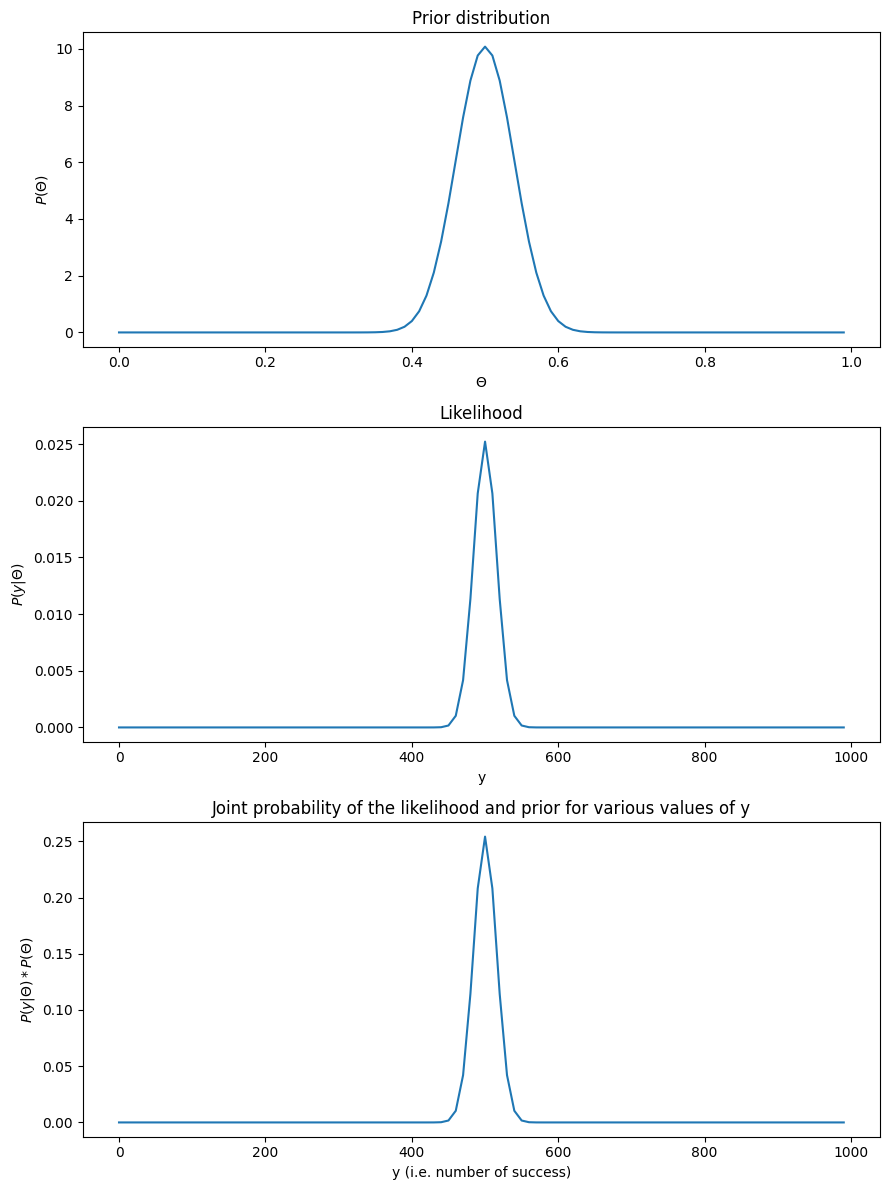

In [139]:
theta = 0.5 # Our prior about the most likely value of theta
alpha = 80  # Our prior confidence for the theta value
beta = 80  # Our prior confidence for the theta value
n = 1000  # Say we run an experiment in which we throw the coin a 1000 times
ys = np.arange(0, 1000, 10) # We can plot the joint probability of our likelihood and prior for different observation to see what that looks like:

fig, ax = plt.subplots(3, figsize=(9, 12))
ax[0].plot(np.arange(0, 1, 0.01), [beta_distribution(theta, alpha, beta) for theta in np.arange(0, 1, 0.01)], label=f"$\\alpha$={alpha} & $\\beta$={beta}")
ax[0].set_ylabel("$P(\\Theta)$")
ax[0].set_xlabel("$\\Theta$")
ax[0].set_title("Prior distribution")

ax[1].plot(np.arange(0, 1000, 10), [binomial_distribution(n, y, theta) for y in np.arange(0, 1000, 10)])
ax[1].set_ylabel("$P(y|\\Theta)$")
ax[1].set_xlabel("y")
ax[1].set_title("Likelihood")

ax[2].plot(ys, [binomial_beta_joint(y, n, theta, alpha, beta) for y in ys])
ax[2].set_ylabel("$P(y|\\Theta) * P(\\Theta)$")
ax[2].set_xlabel("y (i.e. number of success)")
ax[2].set_title("Joint probability of the likelihood and prior for various values of y")
plt.tight_layout()
plt.show()
plt.close()

It might not be self-evident what we are looking at, but hopefully by playing around a bit more and looking at the graphs will give you an intuition about it all. In the above, the first plot is our prior, the second is the likelihood of the data if $\Theta=0.5$, and the lower part is the joint probability of the two. By the look of it, the data look very much like the likelihood. Now let's try to change our prior. Let's say we got the coin from the magician shop, so we are less confident about the actual theta:

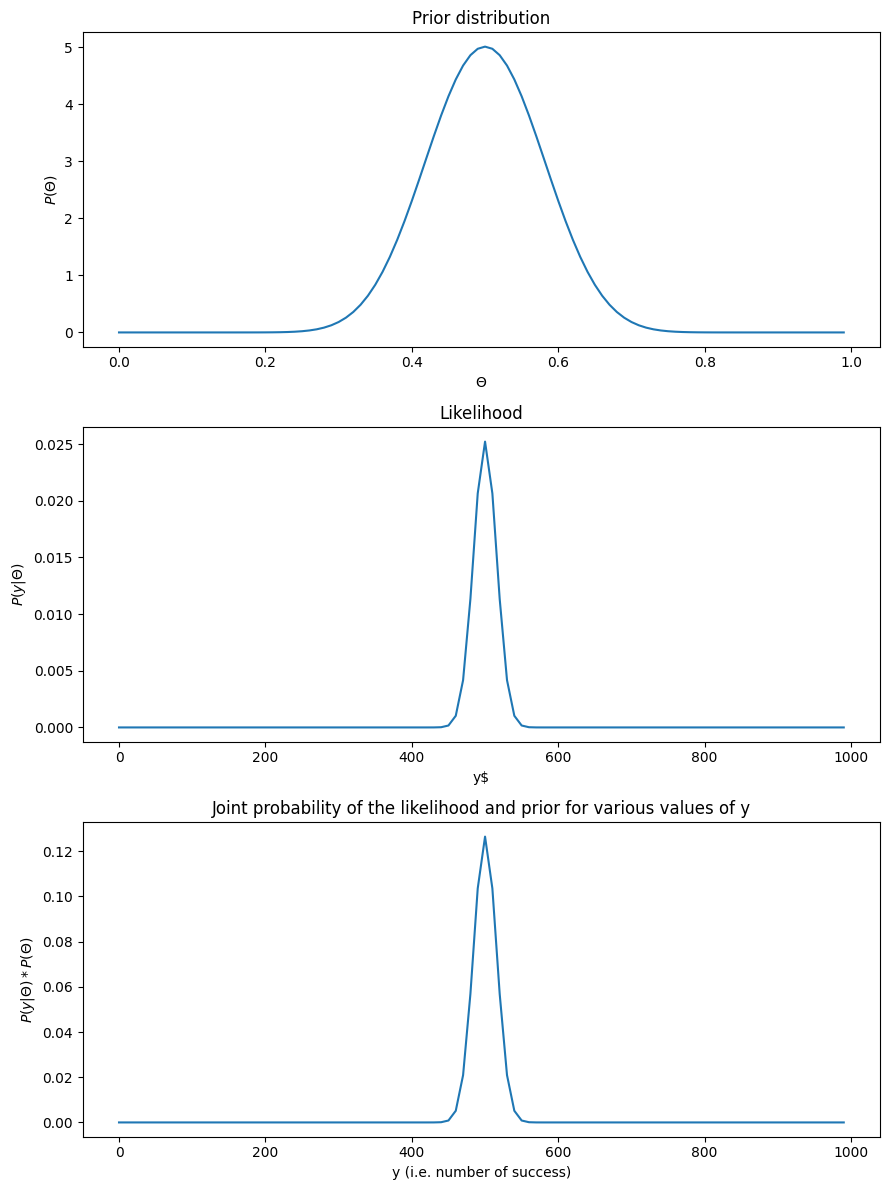

In [138]:
theta = 0.5 # Our prior about the most likely value of theta
alpha = 20  # Our prior confidence for the theta value
beta = 20  # Our prior confidence for the theta value
n = 1000  # Say we run an experiment in which we throw the coin a 1000 times
ys = np.arange(0, 1000, 10) # We can plot the joint probability of our likelihood and prior for different observation to see what that looks like:

fig, ax = plt.subplots(3, figsize=(9, 12))
ax[0].plot(np.arange(0, 1, 0.01), [beta_distribution(theta, alpha, beta) for theta in np.arange(0, 1, 0.01)], label=f"$\\alpha$={alpha} & $\\beta$={beta}")
ax[0].set_ylabel("$P(\\Theta)$")
ax[0].set_xlabel("$\\Theta$")
ax[0].set_title("Prior distribution")

ax[1].plot(ys, [binomial_distribution(n, y, theta) for y in np.arange(0, 1000, 10)])
ax[1].set_ylabel("$P(y|\\Theta)$")
ax[1].set_xlabel("y")
ax[1].set_title("Likelihood")

ax[2].plot(ys, [binomial_beta_joint(y, n, theta, alpha, beta) for y in ys])
ax[2].set_ylabel("$P(y|\\Theta) * P(\\Theta)$")
ax[2].set_xlabel("y (i.e. number of success)")
ax[2].set_title("Joint probability of the likelihood and prior for various values of y")
plt.tight_layout()
plt.show()
plt.close()

Not much happens. The prior doesn't seem to have much of an impact, the joint distribution kind of always look like the likelihood of the data. Now let's try something else. In the examples so far, the likelihood was always in line with the prior, meaning that the probability distribution of the data was always such that the most likely value in the data is 0.5. That's just to be expected, becausewe set  the $\Theta$ parameter of our prior and likelihood to be the same. Now that doesn't need to be the case. If we have a coin that is biased towards tail, then the true likelihood should be biased away from 0.5 towards lower values, even if we believe that the coin isn't biased. This may seem like a really strange thing to say: we always know what the $\Theta$ value is, because we pass it to the binomial distribution, so of course we know that our prior is correct. It wouldn't make any sense to choose a prior that is different from what we pass to the binomial distribution function. 

But in a real life problem, we don't know the true $\Theta$ value, remember, that's the very reason we are doing all of this in the first place. It is really important to understand that the $\Theta$ in the various bits of the Bayes theorem don't need to be the same values. In fact, in the prior, $\Theta$ refer to all possible value of $\Theta$  between 0 and 1 and the belief we have in each, while in the likelihood, the $\Theta$ is fixed for all possible values of y. The likelihood follows a binomial distribution, but the parameters of that distribution depend on the data. Say if we run an experiment in which we throw the coin a 1000 times, and we repeat that experiment a 100 times: we will get the distribution of $P(\Theta)$ centered on 0.5 only if the coin isn't biased. If the coin is biased, then of course the center of the distribution won't be 0.5. Now let's see what happens if that were to be the case:

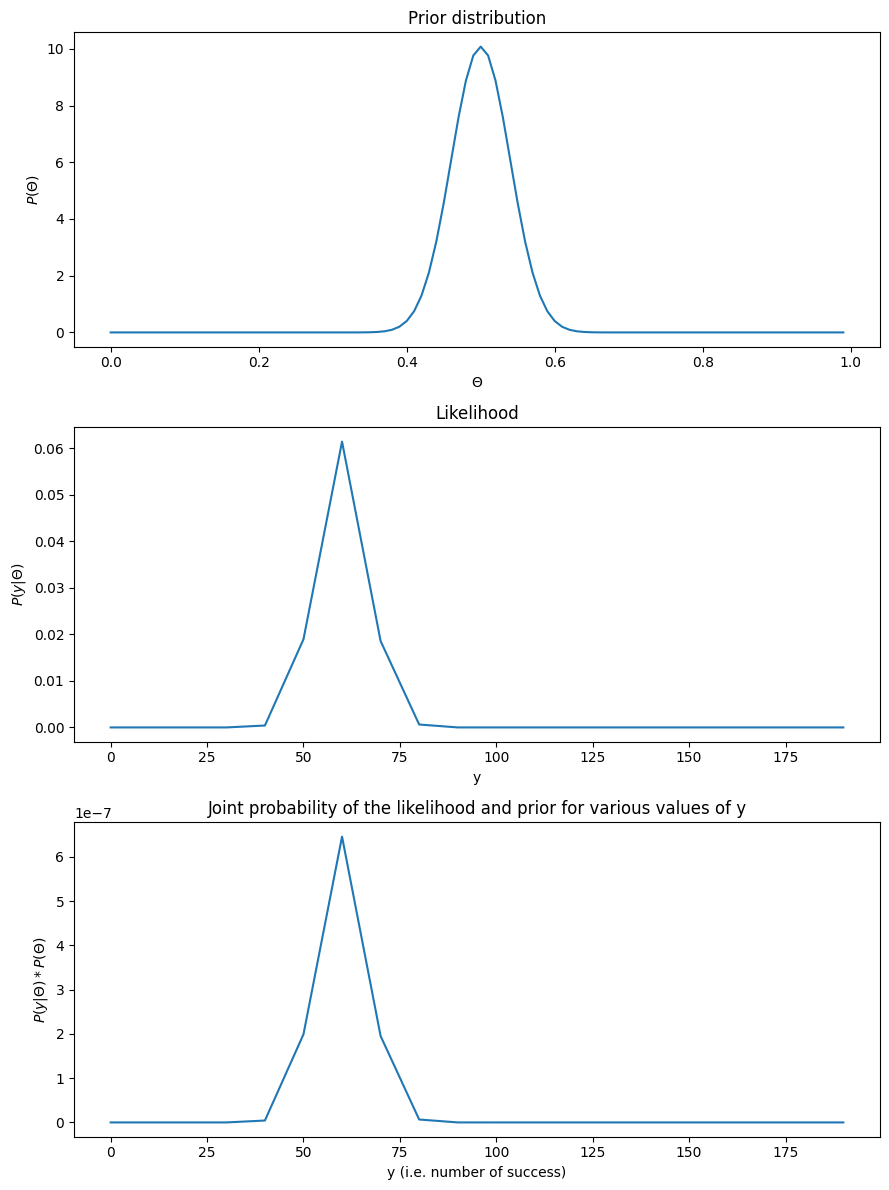

In [149]:
prior_theta = 0.5 # Our prior about the most likely value of theta
alpha = 80  # Our prior confidence for the theta value
beta = 80  # Our prior confidence for the theta value
true_theta = 0.3
n = 200  # Say we run an experiment in which we throw the coin a 1000 times
ys = np.arange(0, n, 10) # We can plot the joint probability of our likelihood and prior for different observation to see what that looks like:

fig, ax = plt.subplots(3, figsize=(9, 12))
ax[0].plot(np.arange(0, 1, 0.01), [beta_distribution(theta, alpha, beta) for theta in np.arange(0, 1, 0.01)], label=f"$\\alpha$={alpha} & $\\beta$={beta}")
ax[0].set_ylabel("$P(\\Theta)$")
ax[0].set_xlabel("$\\Theta$")
ax[0].set_title("Prior distribution")

ax[1].plot(ys, [binomial_distribution(n, y, true_theta) for y in np.arange(0, n, 10)])
ax[1].set_ylabel("$P(y|\\Theta)$")
ax[1].set_xlabel("y")
ax[1].set_title("Likelihood")

ax[2].plot(ys, [binomial_beta_joint(y, n, true_theta, alpha, beta) for y in ys])
ax[2].set_ylabel("$P(y|\\Theta) * P(\\Theta)$")
ax[2].set_xlabel("y (i.e. number of success)")
ax[2].set_title("Joint probability of the likelihood and prior for various values of y")
plt.tight_layout()
plt.show()
plt.close()

## *A little aside: we can compute the empirical probability of obtaining 3/10 heads+
In fact, we can very easily verify that this is true by running another little simulation (very much the same we did before):

In [80]:
# Let's repeat the 10 coin tosses a 10000 times, just to we get closer to the actual value:
n_iteration = 10000

# ========================================================
# Experiment 1:
P["X=3/10 heads"] = 0
for i in range(n_iteration):
    n_throw = 10 # 20 throws instead of 10
    n_head = 0 # Before we start, we have zero head
    n_tail = 0 # And zero tails

    for ii in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            n_head += 1
        else:   # If our random number is more than 0.5, we consider that our coin landed on tail
            n_tail += 1
    if n_head == 3:
        P["X=3/10 heads"] += 1
print(f"P(X = 3/10 heads)={P["X=3/10 heads"] / n_iteration}")

P(X = 3/10 heads)=0.1149


So as you can see, when we run the same experiment 10000 times, we get about 12% of the times 3 heads, in line with the Binomial distribution. This may seem familiar with how I described above how we can obtain an empirial probability. With binomial distribution, we get $P(X=3)$, and with simulation above, we get $\hat{P}(X=3)$